#### SECTION A BATCH 1
#### WEEK 3 DATE: 31 MARCH 2022
## EXER 1

In [184]:
# Import required libraries

# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

from sklearn.preprocessing import (LabelEncoder, OneHotEncoder,
StandardScaler, MinMaxScaler)

from sklearn.impute import SimpleImputer

# Modeling Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report)

# Pipeline
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer

In [185]:
# Importing the dataset.
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [186]:
df.shape

(891, 12)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Both 'ParCh' and 'SibSp' attributes indicate the count of family size, hence we can merge them into a single attribute and drop them.

In [188]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [189]:
df.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [190]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

### 6. Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes.

In [191]:
# Checking the count of the missing values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

We can Observe that there are many missing values in the 'Cabin' attribute and less missing values in 'Age' & 'Embarked' attributes.

##### As the attribute 'Embarked' is categorical, we can replace it's null values with mode.

In [192]:
pd.DataFrame(df['Embarked'].value_counts())

,Embarked
S,644
C,168
Q,77


<AxesSubplot:xlabel='Embarked', ylabel='count'>

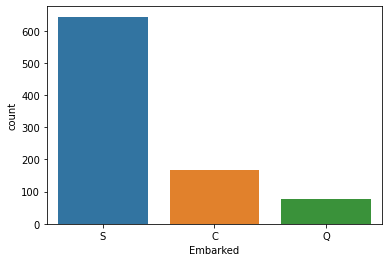

In [193]:
sns.countplot(x = "Embarked",data = df)

In [194]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].isnull().sum()

0

##### Lets fill the missing values in 'Age' using interpolate function of pandas.

In [195]:
df['Age'] = df['Age'].interpolate()

##### We can drop the irrelavent attributes such as 'Name', 'Ticket', 'PassengerId' and especially 'Cabin' which has many missing values.

In [196]:
cols = ['Name','Ticket','PassengerId','Cabin']
df.drop(cols,axis = 1,inplace = True)

In [197]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

In [198]:
pd.DataFrame(df.corr()['Survived'].abs().sort_values(ascending=False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Age,0.062164
FamilySize,0.016639


In [199]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


### 7. Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and model fitting in one step.

In [200]:
X_train = df[['Age','Fare','FamilySize','Sex','Embarked','Pclass']]
Y_train = df['Survived']

In [201]:
integer_features = X_train.select_dtypes(exclude="object").columns

#Creating ss transformer to scale the continuous numerical data with StandardScaler()
ss = Pipeline(steps=[('ss', StandardScaler())])

In [202]:
categorical_features = X_train.select_dtypes(include="object").columns

#Creating ohe transformer to encode the categorical data with OneHotEncoder()
ohe = Pipeline(steps=[('ohe', OneHotEncoder(drop='first'))])

In [203]:
#Creating preprocess column transformer to combine the ss and ohe pipelines
preprocess = ColumnTransformer(
                    transformers=[
                        ('cont', ss, integer_features),
                        ('cat', ohe, categorical_features)
                    ])

In [204]:
clf = Pipeline([('preprocessor', preprocess),('classfier',GaussianNB())])

In [205]:
# Training the pipeline by using the .fit() function
clf.fit(X_train,np.ravel(Y_train))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Fare', 'FamilySize', 'Pclass'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['Sex', 'Embarked'], dtype='object'))])),
                ('classfier', GaussianNB())])

### 8. Perform Bayes classification using cross validation.

In [206]:
cross_val_score(clf, X_train, Y_train, cv=5, scoring="accuracy").mean()

0.7823614336827569

### 9. Tabulate using relevant measures of accuracy , Sensitivity and specificity.

In [207]:
Y_pred = cross_val_predict(clf, X_train, Y_train, cv=10)
c = confusion_matrix(Y_train,Y_pred)
pd.DataFrame(c,)

,0,1
0,461,88
1,98,244


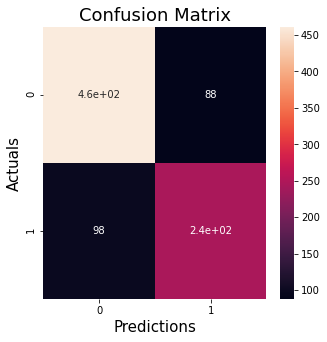

In [208]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(c, annot=True)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [209]:
# Using the .ravel() method to get the values of True-Negative, False-Positive,
# False-Negative and True-Positive from the confusion matrix.
tn, fp, fn, tp = c.ravel()

In [210]:
accuracy_rate = (tp + tn) / (tp+fp+fn+tn)
accuracy_rate

0.7912457912457912

In [211]:
sensitivity_tpr = tp/(fn+tp)
sensitivity_tpr

0.7134502923976608

In [212]:
specificity_tnr = tn/(tn+fp)
specificity_tnr

0.8397085610200364

### 10. Visualize the ROC curve and comment on performance

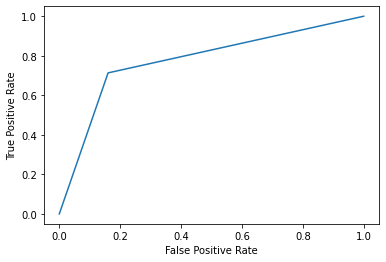

0.7765794267088486

In [213]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(Y_train,  Y_pred)

plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score
r =  roc_auc_score(Y_train,Y_pred)
r

ROC curve moving towards the top and left means that the classifier is good. 

The area under the curve is directly proportional to how good the classifier is. And a 45 degree line corresponds to random predictions. As the area under the curve is 0.73, it is a moderately accurate model.

## EXER 2

In [214]:
df1 = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df1.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,Initmates,Intimate,Intimates,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,4,General,Dresses,Dresses,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1


In [215]:
df1.drop('Unnamed: 0',axis = 1,inplace =True)

## 5. Preprocessing:

### a. Find any null values are present or not, If present remove those data

In [216]:
pd.DataFrame(df1.isnull().sum())

,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Positive Feedback Count,0
Division Name,14
Department Name,14
Category,14
Recommended IND,0


In [217]:
df1.shape

(23486, 10)

There are many null values in 'Title' & 'Review Text' and a few in 'Division Name','Department Name' & 'Category'.

In [218]:
df1.dropna(inplace =True)

In [219]:
df1.shape

(19662, 10)

In [220]:
df1.head()

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,4,General,Dresses,Dresses,0
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,1


### b. Remove the data that have less than 5 reviews.

In [221]:
reviewCount = df1['Clothing ID'].value_counts().rename_axis('ID').reset_index(name='Counts')
reviewCount

,ID,Counts
0,1078,871
1,862,658
2,1094,651
3,1081,487
4,829,452
...,...,...
1090,887,1
1091,48,1
1092,1127,1
1093,1143,1


In [222]:
l5 = reviewCount.loc[reviewCount.Counts<5,'ID']
df1 = df1[df1["Clothing ID"].isin(l5)==False]
df1.shape

(18401, 10)

### c. Clean the data and remove the special characters and replace the contractions with its expansion. Convert the uppercase character to lower case. Also, remove the punctuations.


In [223]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [224]:
# Creating a user defined function to clean the data as mentioned.
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [225]:
x = "Hello what're you doing. I can't do this"
print(cont_to_exp(x))

Hello what are you doing. I cannot do this


In [226]:
df1["Review Text"] = df1["Review Text"].apply(lambda x:cont_to_exp(x))
df1["Review Text"]

2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it is fun, f...
5        I love tracy reese dresses, but this one is no...
6        I aded this in my basket at hte last mintue to...
7        I ordered this in carbon for store pick up, an...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 18401, dtype: object

### 6. Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets (80:20).


In [227]:
df1.head()

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,0,General Petite,Bottoms,Pants,1
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,4,General,Dresses,Dresses,0
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,1
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,4,General Petite,Tops,Knits,1


In [228]:
features = df1[['Age','Rating','Positive Feedback Count']]
target = df1['Recommended IND']

x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2)

### 7. Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if item is recommended

In [229]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.9285520239065471

### 8. Tabulate accuracy in terms of precision, recall and F1 score

In [230]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,675,29
1,234,2743


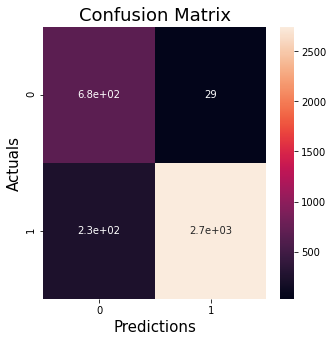

In [231]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [232]:
# Using the .ravel() method to get the values of True-Negative, False-Positive,
# False-Negative and True-Positive from the confusion matrix.
tn, fp, fn, tp = c.ravel()

In [233]:
# Precision Score = TP / (FP + TP)
# Sensitivity or Recall = TP / (FN + TP)
# F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84       704
           1       0.99      0.92      0.95      2977

    accuracy                           0.93      3681
   macro avg       0.87      0.94      0.90      3681
weighted avg       0.94      0.93      0.93      3681

